# Seaborn


- Why Use Seaborn Library ? 
- 

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and `internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.` Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.


# Import Libraries

In [12]:
# pip install seaborn
import pandas as pd
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [13]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

In [14]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [15]:
# all Categorical distinct Data values
for column , dtypes in zip(tips.columns,tips.dtypes):
    if dtypes != 'float64':
        print(column, " : \n",list(tips[column].unique()))

sex  : 
 ['Female', 'Male']
smoker  : 
 ['No', 'Yes']
day  : 
 ['Sun', 'Sat', 'Thur', 'Fri']
time  : 
 ['Dinner', 'Lunch']
size  : 
 [2, 3, 4, 1, 6, 5]


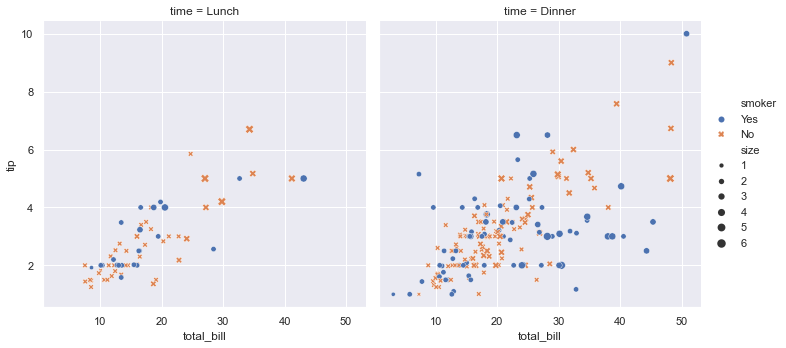

In [16]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

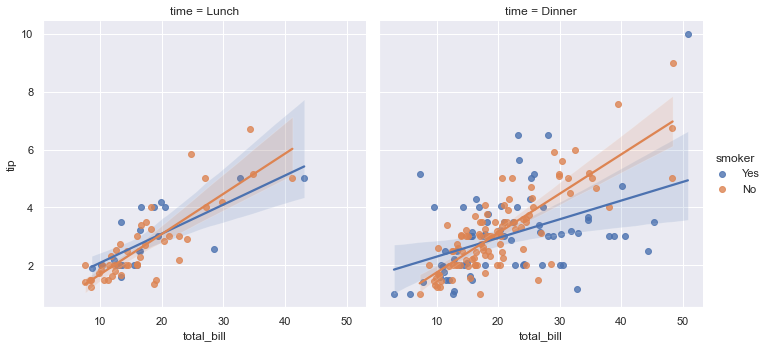

In [17]:
# Create a visualization
sns.lmplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker"
)

In [18]:
# import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.describe(include='all')

,dataset,x,y
count,44,44.000000,44.000000
unique,4,NaN,NaN
top,I,NaN,NaN
freq,11,NaN,NaN
mean,NaN,9.000000,7.500682
std,NaN,3.198837,1.958925
min,NaN,4.000000,3.100000
25%,NaN,7.000000,6.117500
50%,NaN,8.000000,7.520000
75%,NaN,11.000000,8.747500


In [19]:
for datasettype in list(df['dataset'].unique()):
    print(df[df['dataset']==datasettype].shape)

(11, 3)
(11, 3)
(11, 3)
(11, 3)


In [26]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


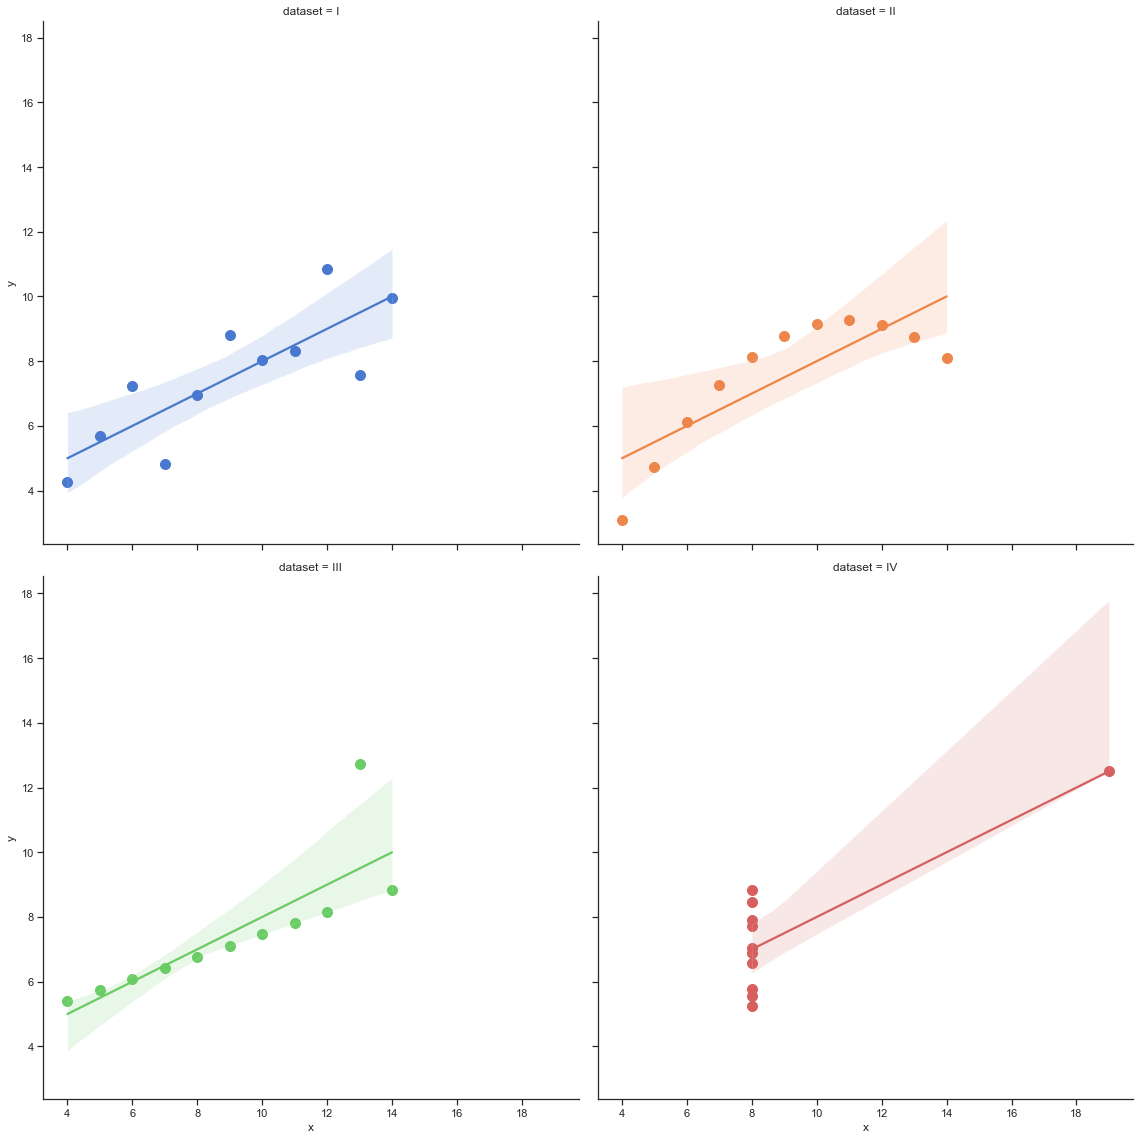

In [30]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", 
    y="y", 
    col="dataset", 
    hue="dataset",
    col_wrap=2, 
    palette="muted", 
    # ci=95,
    height=8, 
    scatter_kws={"s": 100, "alpha": 1}
)

## Scatter Plot

<AxesSubplot:xlabel='carat', ylabel='price'>

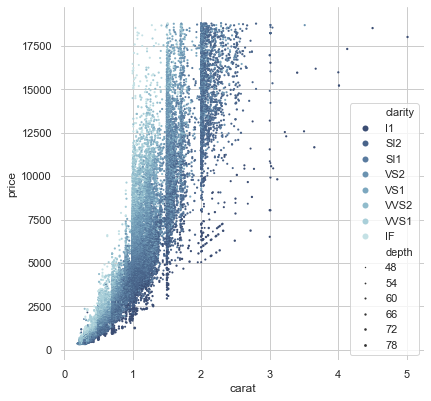

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

In [32]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data: House Prices 🏡
data = {
    'Size_sqft': [800, 1200, 1500, 1800, 2000, 2200, 2500, 2700, 3000, 3500],
    'Price': [150000, 200000, 250000, 280000, 300000, 350000, 400000, 420000, 500000, 600000],
    'Bedrooms': [2, 2, 3, 3, 3, 4, 4, 4, 5, 5],
    'Age': [30, 25, 20, 18, 15, 12, 10, 8, 5, 3]
}

# Convert to DataFrame
df = pd.read_csv('relationships_dataset.csv')

# Set the theme
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df, x='Size_sqft', y='Price', 
    hue='Bedrooms', size='Age', 
    palette='coolwarm', alpha=0.8, edgecolor='black'
)

# Titles and Labels
plt.title('House Price vs Size')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price ($)')
plt.legend(title="Bedrooms & Age")
plt.show()


ValueError: Could not interpret value `Size_sqft` for `x`. An entry with this name does not appear in `data`.

<Figure size 576x360 with 0 Axes>